# Lending Club Case Study
<h3>1. Data Understanding</h3>

1. Problem Statement
2. Objectives
3. Understanding the dataset
4. Dataset Attributes
5. Dataset Row Analysis
6. Handling missing data
7. Handling Outliers

<h4> 1.1. Problem Statement</h4>
Lending Club, a consumer finance marketplace that specializes in providing various loan options to urban customers, faces a significant challenge in optimizing its loan approval process. The company must carefully evaluate loan applications to minimize financial losses, particularly those caused by extending credit to high-risk applicants.

These financial losses, known as credit losses, arise when borrowers fail to repay their loans or default. In other words, borrowers categorized as "charged-off" contribute most significantly to the company's losses.

The main goal of this exercise is to help Lending Club reduce credit losses. This challenge stems from two key scenarios:

1. Approving loans for applicants likely to repay is essential, as they generate revenue through interest payments. Rejecting such applicants could result in a loss of potential business opportunities.
2. Conversely, approving loans for applicants who are unlikely to repay and are at risk of default can lead to substantial financial losses.

<h4>1.2. Objectives</h4>

The objective is to identify applicants who are likely to default on their loans, thereby minimizing credit losses. This case study aims to accomplish this through exploratory data analysis (EDA) using the provided dataset.

The goal is to uncover the key factors (or driver variables) that strongly indicate loan defaults. This insight can be leveraged by the company to improve portfolio management and enhance risk assessment strategies.

<h4>1.3. Understanding the dataset</h4>

This dataset contains details about previous loan applicants and their "Charged Off" status. The aim is to uncover patterns that predict the likelihood of default, enabling better decision-making, such as denying loans, reducing loan amounts, or offering loans to high-risk applicants at increased interest rates.

It is important to note that this dataset only includes information about approved loans and does not cover the criteria for loan rejections. The primary focus is to identify key factors within the dataset that contribute to loan defaults. This analysis will provide a basis for hypothesis development. 

The loan approval process involves three key steps:
1. Borrower Request: The applicant requests a specific loan amount (loan_amnt).
2. Approval Decision: Based on historical data and risk assessment, the approver determines the loan amount (funded_amnt).
3. Investor Decision: The investor finalizes the amount to be disbursed (funded_amnt_inv).

<h4>1.4. Dataset Attributes</h4>

<h5>Primary Atribute</h5>

* **Loan Status**: The Principal Attribute of Interest (loan_status). This column consists of three distinct values:
    * **Fully-Paid**: Signifies customers who have successfully repaid their loans.
    * **Charged-Off**: Indicates customers who have been labeled as "Charged-Off" or have defaulted on their loans.
    * **Current**: Represents customers whose loans are presently in progress and, thus, cannot provide conclusive evidence regarding future defaults.

<h5>Decision Matrix</h5>

* **Loan Acceptance Outcome** -
There are three potential scenarios:
    * **Fully Paid** - This category represents applicants who have successfully repaid both the principal and the interest rate of the loan.
    * **Current** - Applicants in this group are actively in the process of making loan installments; hence, the loan tenure has not yet concluded. These individuals are not categorized as 'defaulted.'
    * **Charged-off** - This classification pertains to applicants who have failed to make timely installments for an extended period, resulting in a 'default' on the loan.

* **Loan Rejection** - In cases where the company has declined the loan application (usually due to the candidate not meeting their requirements), there is no transactional history available for these applicants. Consequently, this data is unavailable to the company and is not included in this dataset.

<h5>Key Columns of Significance</h5>
The provided columns represent key attributes, commonly known as predictors. These attributes, available during the loan application process, play a critical role in predicting whether a loan is likely to be approved or rejected. However, it is important to note that certain columns may need to be excluded from the analysis due to missing data in the dataset.

* **Customer Demographics**
    * **Annual Income (annual_inc)**: Reflects the customer's annual income. Typically, a higher income enhances the likelihood of loan approval.
    * **Home Ownership (home_ownership)**: Indicates whether the customer owns a home or rents. Home ownership provides collateral, thereby increasing the probability of loan approval.
    * **Employment Length (emp_length)**: Represents the customer's overall employment tenure. Longer tenures signify greater financial stability, leading to higher chances of loan approval.
    * **Debt to Income (dti)**: Measures how much of a person's monthly income is already being used to pay off their debts. A lower DTI translates to a higher chance of loan approval.
    * **State (addr_state)**: Denotes the customer's location and can be utilized for creating a generalized demographic analysis. It may reveal demographic trends related to delinquency or default rates.

* **Loan Characteristics**
    * **Loan Amount (loan_amt)**: Represents the amount of money requested by the borrower as a loan.
    * **Grade (grade)**: Represents a rating assigned to the borrower based on their creditworthiness, indicating the level of risk associated with the loan.
    * **Term (term)**: Duration of the loan, typically expressed in months.
    * **Loan Date (issue_d)**: Date when the loan was issued or approved by the lender.
    * **Purpose of Loan (purpose)**: Indicates the reason for which the borrower is seeking the loan, such as debt consolidation, home improvement, or other purposes.
    * **Verification Status (verification_status)**: Represents whether the borrower's income and other information have been verified by the lender.
    * **Interest Rate (int_rate)**: Represents the annual rate at which the borrower will be charged interest on the loan amount.
    * **Installment (installment)**: Represents the regular monthly payment the borrower needs to make to repay the loan, including both principal and interest.

<h4>1.5. Dataset Row Analysis</h4>

* **Header & Footer Rows**: No header or footer rows.
* **Extra Rows**: No column numbers.
* **Summary Rows**: No summary rows.
* **Identifying and Removing Duplicate Rows**: Duplicate rows in the dataset will be identified and removed.

<h4>1.6. Handling Missing Data</h4>

* **Dropping Columns**: Columns with a high percentage of missing values were dropped.
* **Removing Rows**: Rows with a high percentage of missing values were dropped.
* **Imputing Missing Values**: Columns with a lower percentage of missing values underwent imputation of missing values.

<h4>1.7. Handling Outliers</h4>

* All outliers were removed as part of the analysis.

<h3>2. Data Cleaning</h3>

1. Loading data from loan CSV
2. Checking for null values in the dataset
3. Checking for unique values
4. Checking for duplicated rows in data
5. Dropping records
6. Handling Missing Values
7. Outlier Treatment

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h4>2.1 Loading data from loan CSV</h4>

In [2]:
loan= pd.read_csv('loan.csv')

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan.shape

(39717, 111)

<h4>2.2 Checking for null values in the dataset</h4>

In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# There are many columns that have null values in them. let's remove them first.
loan.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
# After dropping the columns that has null values
loan.shape

(39717, 57)

<h4>2.3 Checking for unique values</h4>

loan.info()

<h4>2.4 Checking for duplicated rows in data</h4>

In [8]:
loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [9]:
# Removing columns that add no value to our analysis
loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   member_id                 39717 non-null  int64  
 2   loan_amnt                 39717 non-null  int64  
 3   funded_amnt               39717 non-null  int64  
 4   funded_amnt_inv           39717 non-null  float64
 5   term                      39717 non-null  object 
 6   int_rate                  39717 non-null  object 
 7   installment               39717 non-null  float64
 8   grade                     39717 non-null  object 
 9   sub_grade                 39717 non-null  object 
 10  emp_title                 37258 non-null  object 
 11  emp_length                38642 non-null  object 
 12  home_ownership            39717 non-null  object 
 13  annual_inc                39717 non-null  float64
 14  verifi

<h4>2.5 Dropping records in data</h4>

* We have 48 columns now.
* In the process, we analyze the factors for loan defaults before approving the loan.
    * We can remove columns such as  "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
    * "desc" also does not add any value now. Removing desc.
    * "out_prncp_inv", "total_pymnt_inv" does not contribute to loan defaults
    * We can also remove "funded_amnt"

In [11]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [12]:
loan.shape

(39717, 21)

In [13]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

In [15]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<h4>2.6 Handling Missing Values</h4>

* Columns with missing values are emp_length and revol_util

In [16]:
# Handling missing values for "emp_length"

print("Mode : " + loan.emp_length.mode()[0])

Mode : 10+ years


In [17]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

* The value count shows that mode value is higher frequency on 10+ years.
* We can safely assign the mode value to the missing values on "emp_length"

In [18]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [20]:
# The rows where the revol_util column has missing values (NaN) are dropped (removed) from the DataFrame.
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

In [22]:
loan.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [23]:
loan.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [24]:
loan.emp_length.value_counts()

10+ years    9517
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

<h4>2.7 Outlier Treatment in data</h4>

#### Standardizing Data.
* We need to remove the '%', '+' and '<' from the above data.

In [25]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : str(x).split('%')[0]))
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : str(x).split('%')[0]))
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in str(x) else (x.split('+')[0] if "+" in x else x.split()[0])))

In [26]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


<Axes: xlabel='annual_inc'>

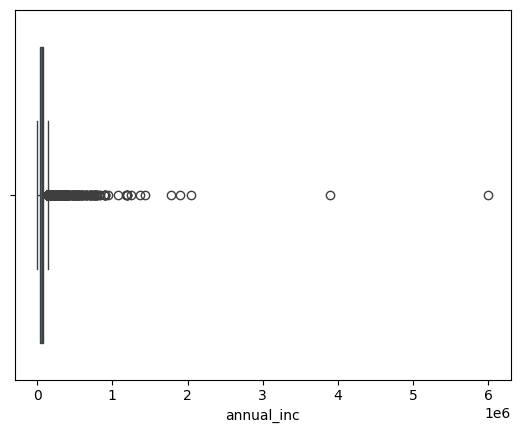

In [27]:
sns.boxplot(x=loan['annual_inc'], orient='h')

* The above graph, clearly shows there are outliers above 95%
* Let's take the quantile approach and perform further actions.

In [28]:
quantile_info= loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [29]:
per_95_annual_inc= loan['annual_inc'].quantile(0.95)
loan= loan[loan.annual_inc<=per_95_annual_inc]

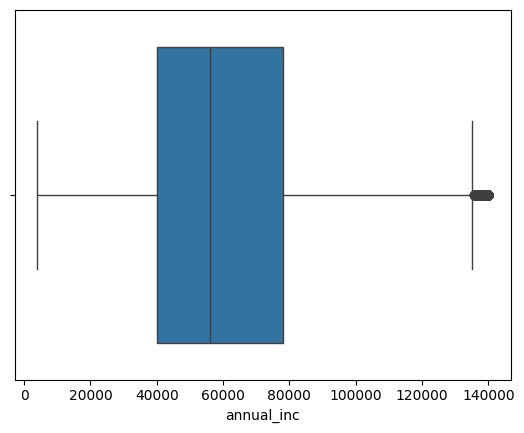

In [30]:
sns.boxplot(x=loan['annual_inc'], orient='h')
plt.show()

#### Visualizing Categorical Data
* We are only looking at defaulter data and subsetting the data while plotting only for 'Charged Off'

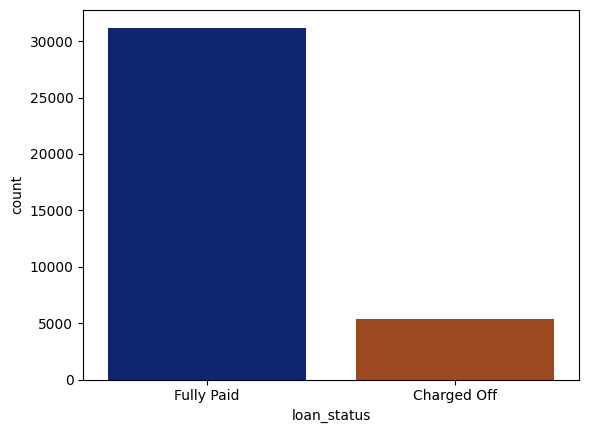

In [31]:
sns.countplot(x = 'loan_status', data = loan, palette='dark')
plt.show()

<h3>3. Data Analysis</h3>

#### Only Grade and Subgrade

#### loan.sub_grade:

* Refer to the column named sub_grade in the loan DataFrame. This column contains strings representing sub-grades such as "A1", "B2", "C3", etc.
* I have converted the extracted string values (e.g., "1", "2", "3") into numeric data types (int or float). This ensures the column is numeric, enabling numerical analysis or modeling.
* I have added the transformed numeric values to the sub_grade column in the loan DataFrame, overwriting the original values.

In [32]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x: str(x)[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [33]:
loan.grade.value_counts()

B    11096
A     9646
C     7467
D     4820
E     2437
F      881
G      259
Name: grade, dtype: int64

* Using hue='sub_grade' in Seaborn plots allows you to add a layer of information by grouping the data based on the sub_grade column. 
* Each sub_grade category will be represented by a different color in the plot.

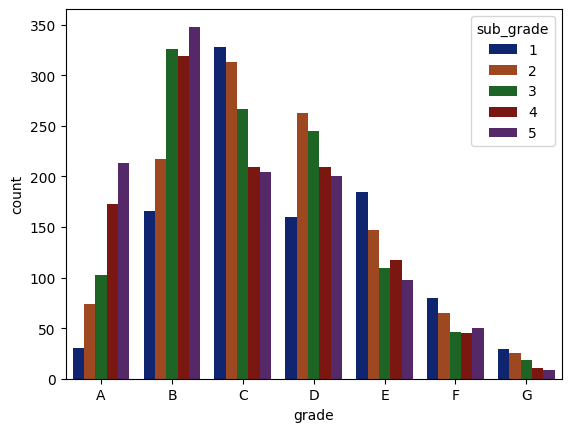

In [34]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

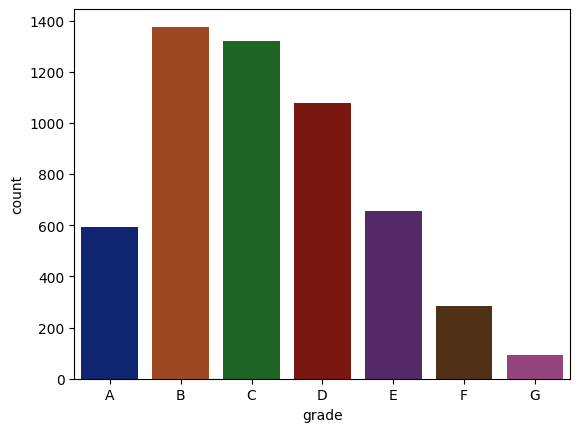

In [35]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data = loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

#### Analyzing home_ownership

In [36]:
# Checking value counts
loan.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

* The above data shows there are only 3 records for None, so we can add these records to others.

In [37]:
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan.home_ownership.value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

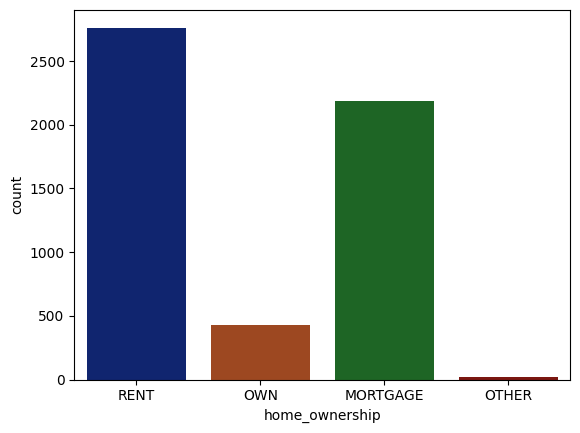

In [38]:
sns.countplot(x = 'home_ownership', data = loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

* This indicates that most applicants either rent or have a mortgage, with a smaller percentage owning their homes. 
* The "OTHER" categories are negligible in comparison.

#### Analyzing purpose

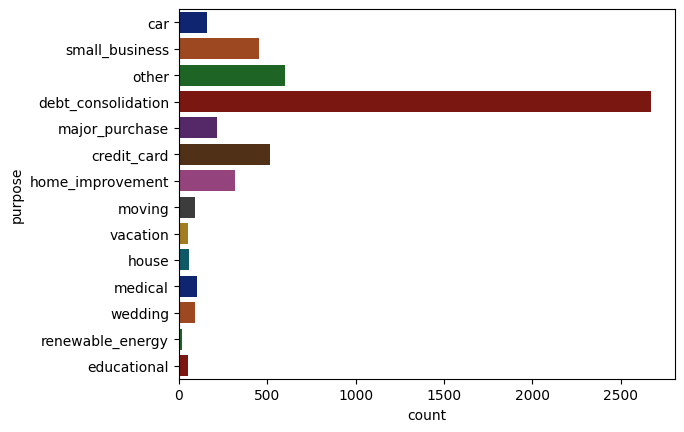

In [39]:
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

* This indicates that the majority of loans are taken for debt consolidation, followed by credit card payments and other purposes.

#### Let us look at other colums like "int_rate", "open_acc", "revol_util", "total_acc", "annual_inc"

In [40]:
loan.int_rate.describe()

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

* Let's create bins from the above categorical variables
* Categorizing interest rates and others into groups using the pd.cut function from the pandas library.

In [41]:
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5, labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'], bins = 5,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [42]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing interest rate, open_acc and annual_inc w.r.t our created bins.

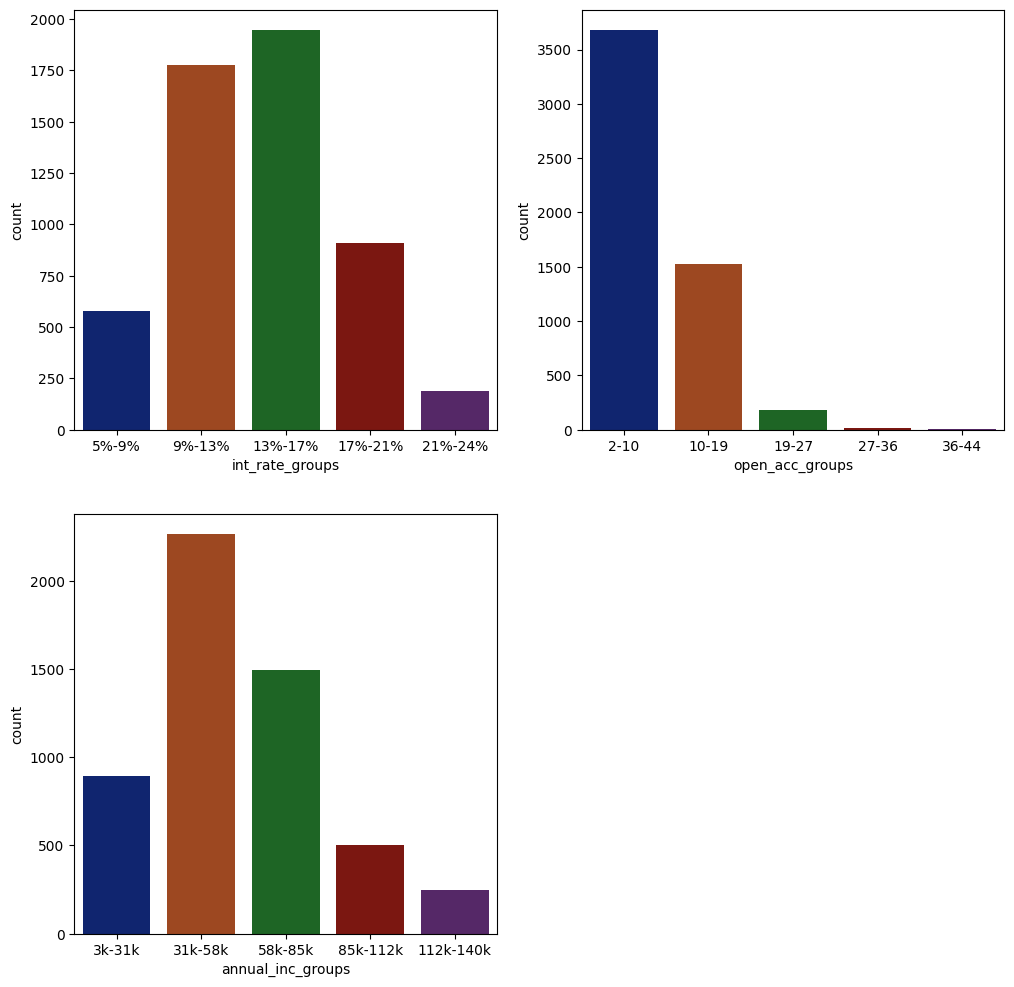

In [43]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x ='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.subplot(222)
sns.countplot(x ='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.subplot(223)
sns.countplot(x ='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

* **int_rate_groups**: This indicates that the majority of loans fall within the 9%-13% interest rate range, followed by the 13%-17% and 5%-9% ranges. 
* **open_acc_groups**: This indicates that most applicants have between 2 to 10 open accounts.
* **annual_inc_groups**: This indicates that most applicants fall within the 31k-58k income range, followed by the 58k-85k range. 

I did not see much difference between **revol_util_groups** and **total_acc_groups**, so I ignored their visualization.

#### Analyzing the term of loan and verification status

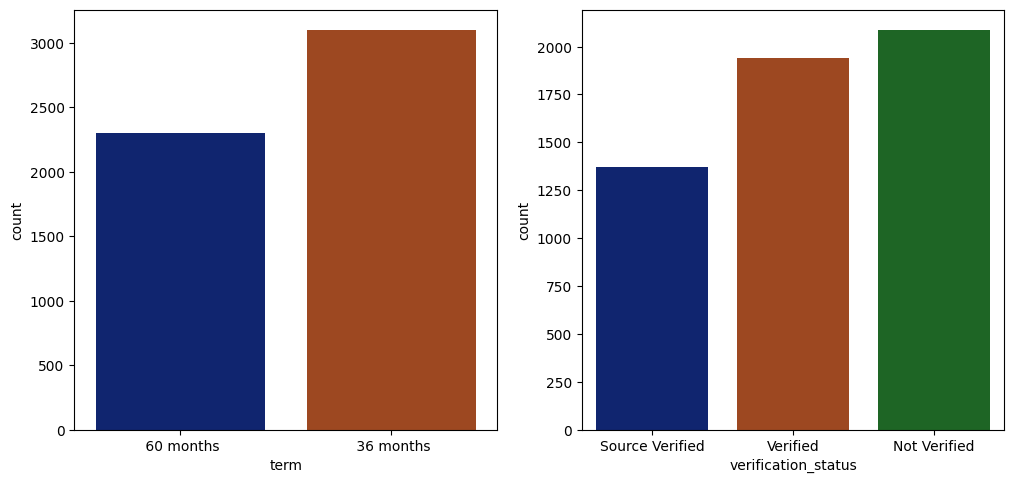

In [44]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='term', data=loan[loan['loan_status']=='Charged Off'], palette='dark')
plt.subplot(222)
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'] , palette='dark')
plt.show()

* This indicates that a significant portion of the loans were not verified

### The number of enquires for loan in the last 6 months for charged off

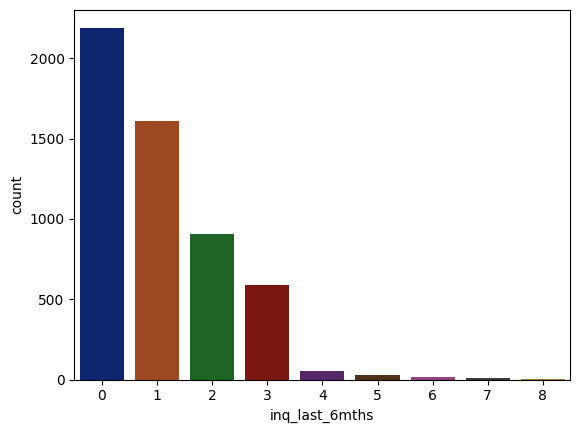

In [45]:
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'], palette='dark')
plt.show()

* This indicates that nearly half of the applicants had no inquiries in the last 6 months, while a significant portion had 1 or 2 inquiries.

#### Analyzing Month and Year of Issue

In [46]:
# Needs formatting to extract Month and Year
loan_month_year= loan['issue_d'].str.partition("-", True)

In [47]:
loan['issue_month']= loan_month_year[0]
loan['issue_year']= '20' + loan_month_year[2] # adding '20' to reflect 2011, etc

In [48]:
#let's inspect the columns
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


* The plt.subplot(221) function in Matplotlib is used to create a subplot within a grid of subplots. The argument 221 is a shorthand notation for specifying the position of the subplot in a grid.
* Here's a breakdown of what 221 means:
    * The first digit (2) represents the number of rows in the grid.
    * The second digit (2) represents the number of columns in the grid.
    * The third digit (1) represents the position of the subplot within the grid, numbered from left to right and top to bottom.
  
* So, plt.subplot(221) creates a subplot in the first position of a 2x2 grid.

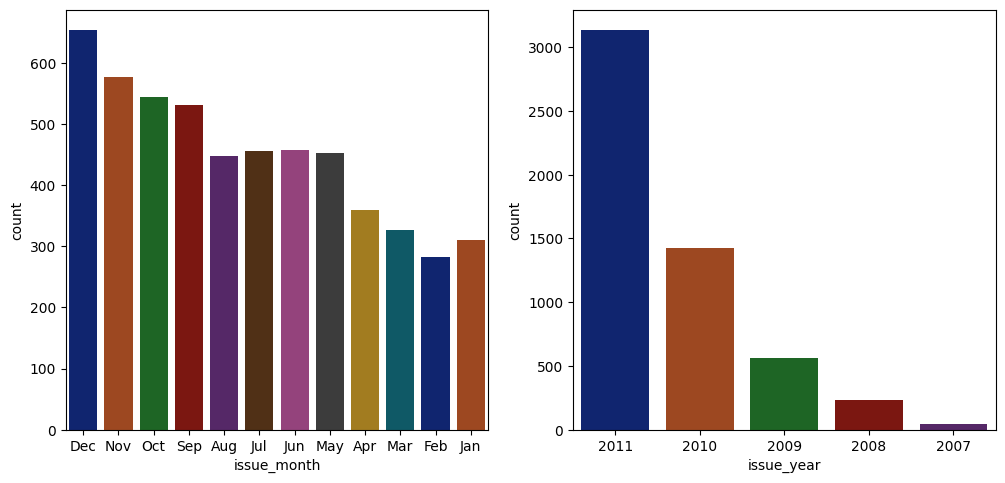

In [49]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'], palette='dark')
plt.subplot(222)
sns.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'], palette='dark')
plt.show()

* The visualizations indicate the defaulted applicants were sanctioned the maximum number of loans during December 2011 compared to other years.

#### Lastly Analyzing dti, loan_amnt, funded_amnt_inv and installment

In [50]:
loan.installment.describe()

count    36606.000000
mean       312.088564
std        199.238384
min         15.690000
25%        163.110000
50%        270.845000
75%        408.902500
max       1305.190000
Name: installment, dtype: float64

In [51]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,labels=['0-6','6-12','12-18','18-24','24-30'])

In [52]:
installment_groups_counts = loan[loan['loan_status'] == 'Charged Off']['installment_groups'].value_counts()

# Print the values
print(installment_groups_counts)

145-274      1490
274-403      1260
14-145       1060
403-531       746
531-660       393
660-789       208
789-918       186
918-1047       41
1047-1176       9
1176-1305       9
Name: installment_groups, dtype: int64


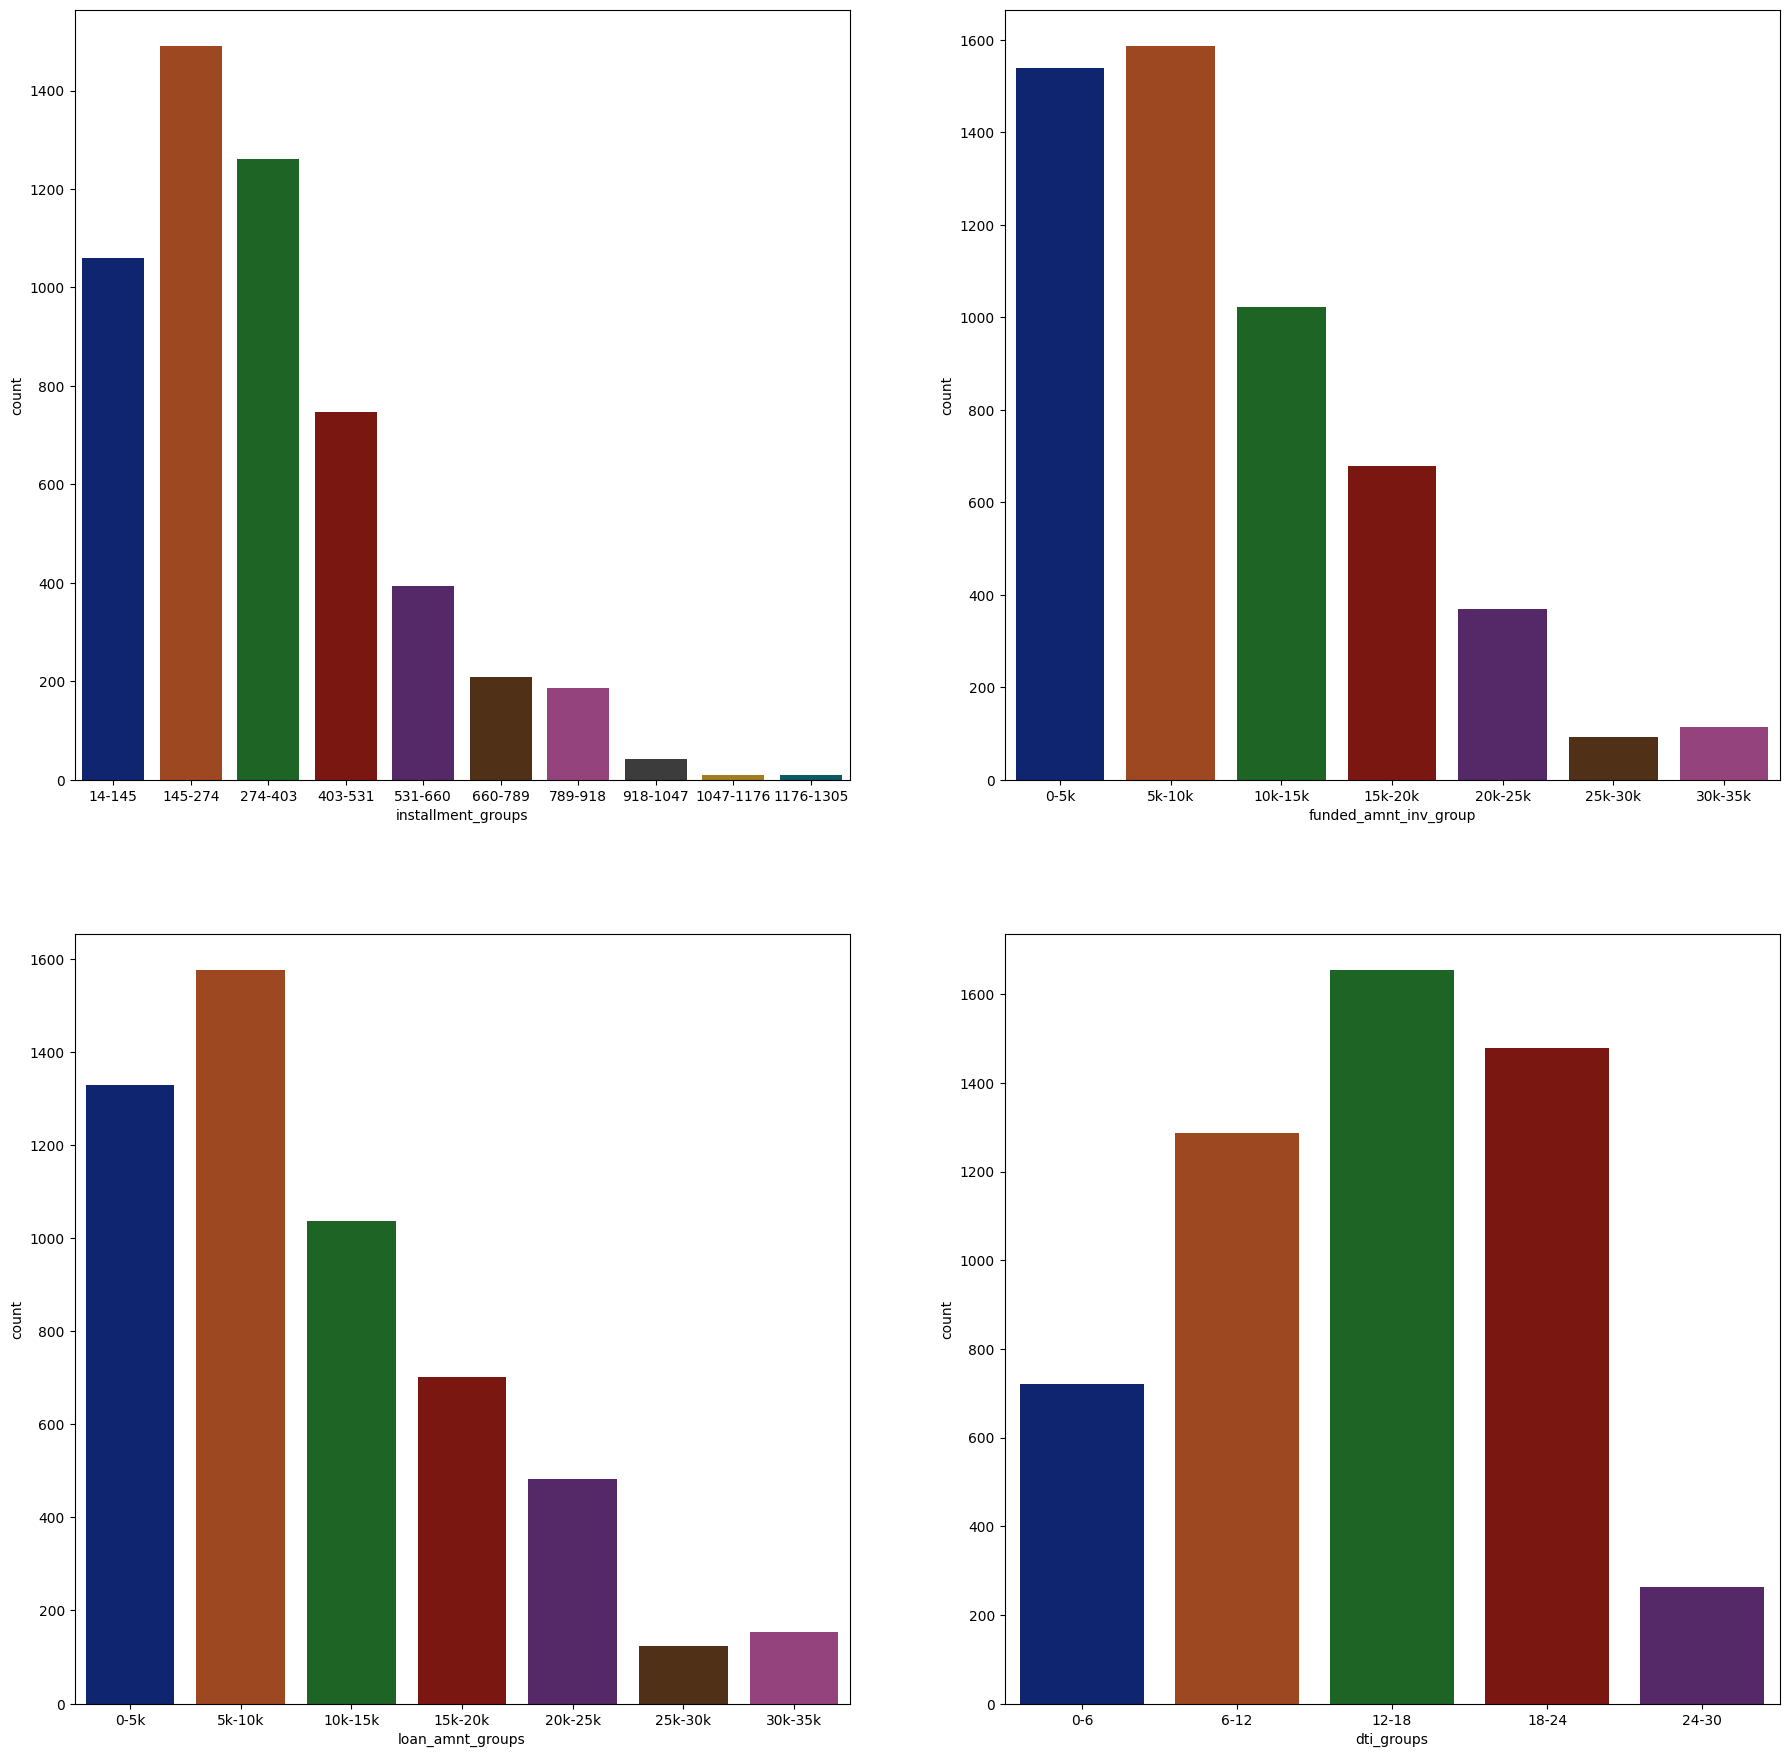

In [53]:
plt.figure(figsize=(22,22))
plt.subplot(221)
sns.countplot(x ='installment_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.subplot(222)
sns.countplot(x ='funded_amnt_inv_group', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.subplot(223)
sns.countplot(x ='loan_amnt_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.subplot(224)
sns.countplot(x ='dti_groups', data=loan[loan.loan_status == 'Charged Off'],palette='dark')
plt.show()

### My Observations with Charged off Applicants, will update my analysis at the end, these are for my notes.

* There is more probability to be **Charged Off** when they fall under these cases,
    * Indicates that most applicants have home ownership as either rent or have a mortgage.
    * When the purpose is to clear other debts. They hit the maximum defaults.
    * Interest rate at a higher percentage (13-17%).
    * Applicants with 2-10 open credit accounts.
    * Most applicants fall within the 31k-58k income range.
    * Most of them have chosen 36 months as their term for the loan.
    * Verifying the applicants is mandatory, in our case most of them were not verified.
    * This indicates that nearly half of the applicants had no inquiries in the last 6 months, while a significant portion had 1 or 2 inquiries.
    * Monthly installments lie between 145-274 months.
    * When funded amount lies between 10-15K with the requested loan amount at 10-15k.
    * When debt to income(dti)ratio lies between 12-18.
    * The 'B' Grade with a Subgrade of B-5 has been the highlight.

* **Interesting fact**:
    * The visualizations indicate the defaulted applicants were sanctioned the maximum number of loans during December 2011 compared to other years.

#### Analyzing Annual income with others to gather more insights on the data

<h5>1. Annual Income vs Loan Purpose</h5>

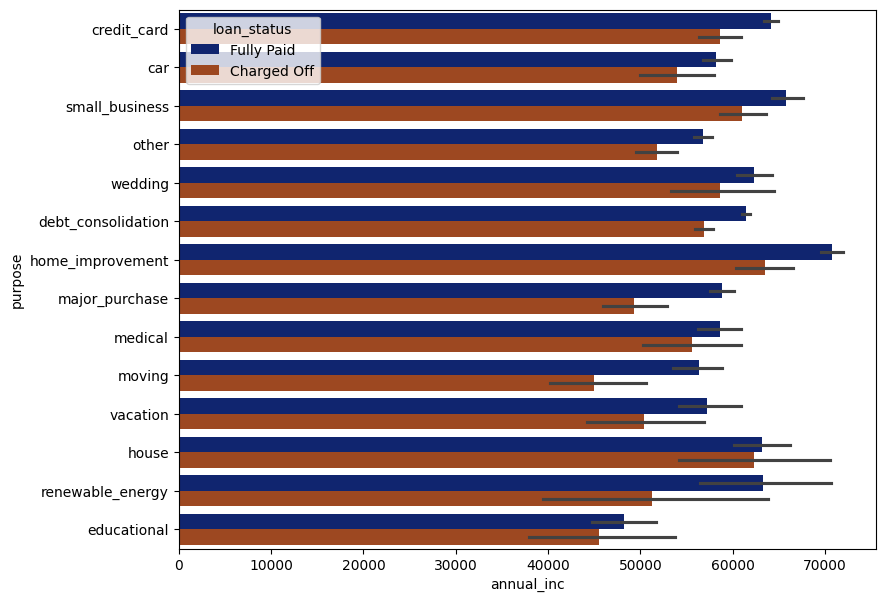

In [54]:
plt.figure(figsize=(9,7))
sns.barplot(data =loan, x='annual_inc', y='purpose', hue ='loan_status', palette='dark')
plt.show()

* The previous observations indicated that "debt_conolidation" defaulted the highest among the others. However, the annual income is comparatively less for those applicants.

    * The Applicants with higher salaries have mostly taken loans for "home improvement", "house", "renewable_enery" and "small_business"

<h5>2. Annual Income vs loan amount</h5>

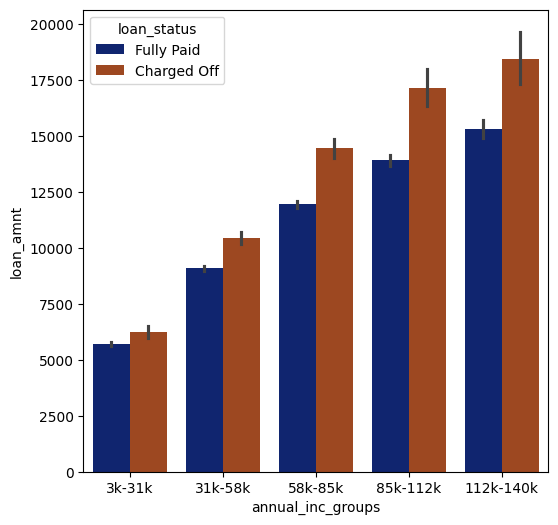

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan, x='annual_inc_groups', y ='loan_amnt', hue ='loan_status', palette='dark')
plt.show()

* The charged off applicants have higher loan amount across all income groups

<h5>3. Annual Income vs Interest Rate</h5>

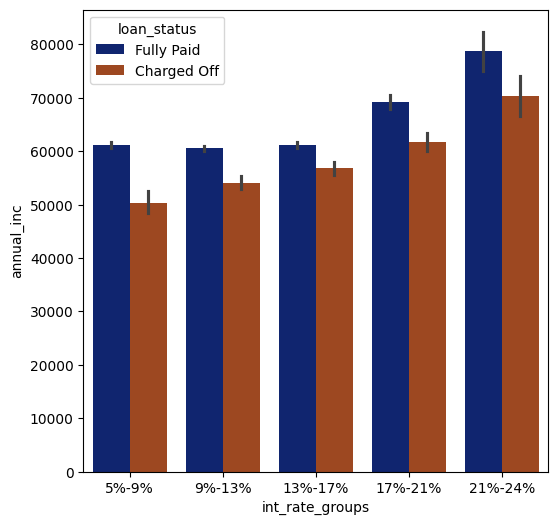

In [56]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan, x='int_rate_groups', y ='annual_inc', hue ='loan_status', palette='dark')
plt.show()

* Interest rate for higher income groups are at a higher rate (21%-24%) and also see them higher at the charged off category

### Analyzing Loan Amount with others to gather more insights on the data

<h5>1. Loan Amount vs Interest Rate</h5>

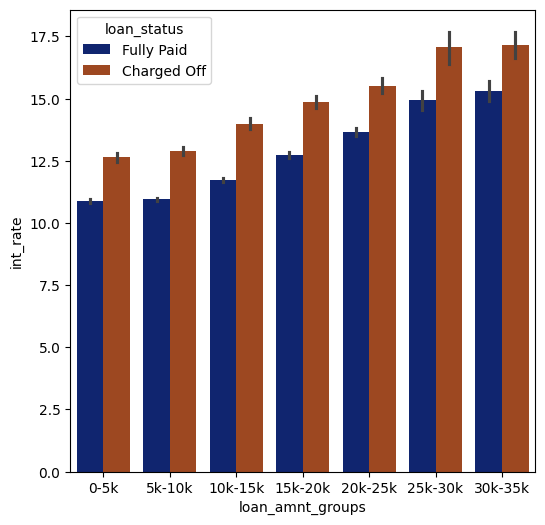

In [57]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan, x='loan_amnt_groups', y ='int_rate', hue ='loan_status', palette='dark')
plt.show()

<h5>2. Loan Amount vs Purpose</h5>

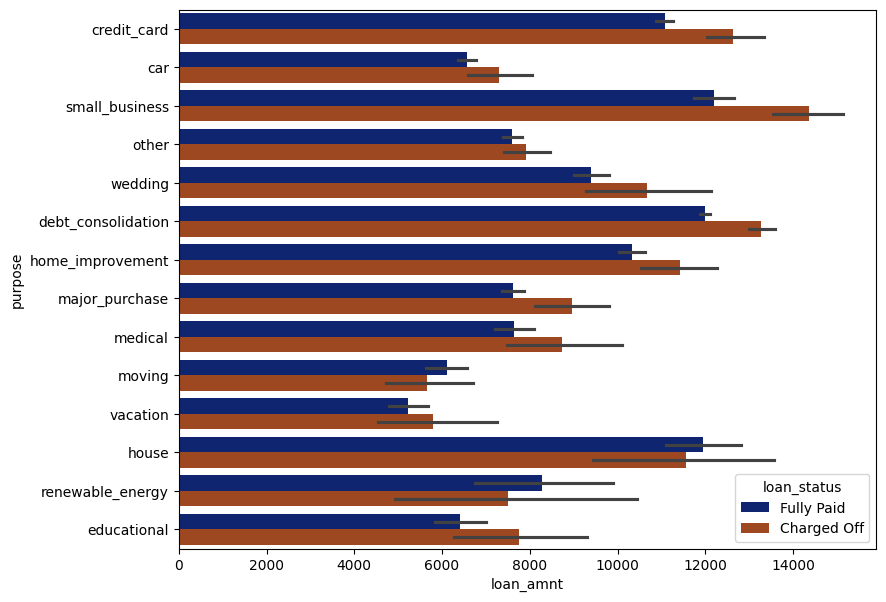

In [58]:
plt.figure(figsize=(9,7))
sns.barplot(data =loan, x='loan_amnt', y='purpose', hue ='loan_status', palette='dark')
plt.show()

<h5>3. Loan Amount vs Home Ownership</h5>

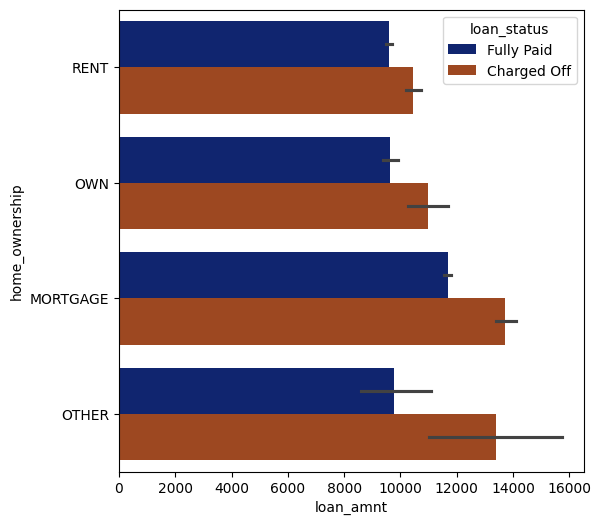

In [59]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan, x='loan_amnt', y ='home_ownership', hue ='loan_status', palette='dark')
plt.show()

<h5>4. Loan Amount vs Month & Year issued </h5>

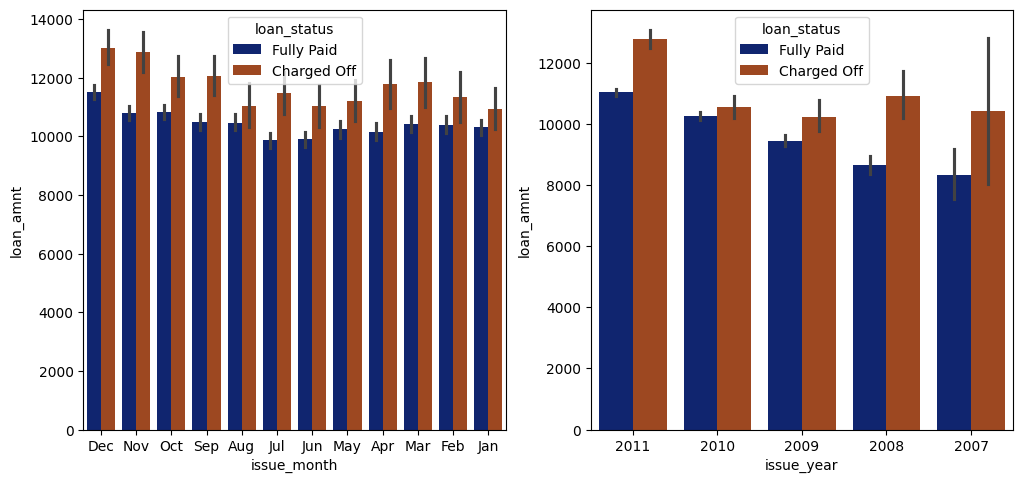

In [60]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.barplot(data =loan, x='issue_month', y='loan_amnt', hue ='loan_status', palette='dark')
plt.subplot(222)
sns.barplot(data =loan, x ='issue_year', y='loan_amnt', hue ='loan_status', palette='dark')
plt.show()

<h5>4. Loan Amount vs Grade </h5>

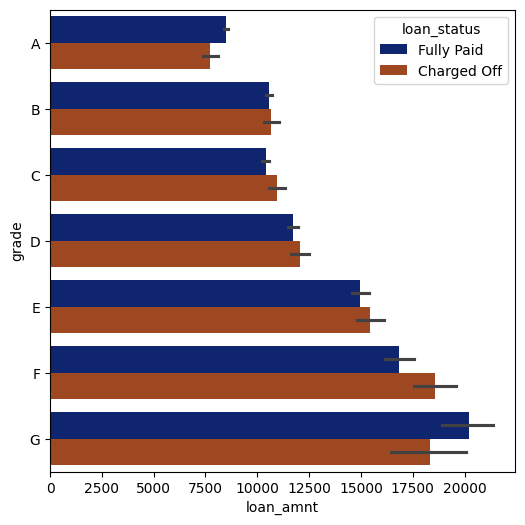

In [61]:
plt.figure(figsize=(6,6))
sns.barplot(data =loan, x='loan_amnt', y ='grade', hue ='loan_status', palette='dark', order=['A','B','C','D','E','F','G'])
plt.show()

<h5>5. Loan Amount vs Employee Length & Verification Status </h5>

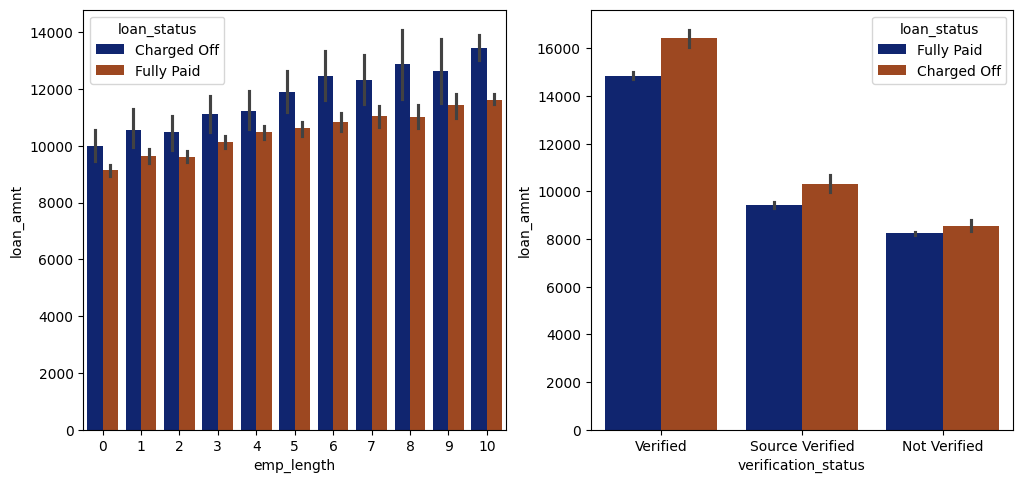

In [62]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.barplot(data =loan, x='emp_length', y='loan_amnt', hue ='loan_status', palette='dark')
plt.subplot(222)
sns.barplot(data =loan, x ='verification_status', y='loan_amnt', hue ='loan_status', palette='dark')
plt.show()

* Loan applicants with ten or more years of experience are more likely to default. This suggests that experience alone may not be a reliable indicator of creditworthiness. The company should use a more comprehensive credit scoring system that factors in other risk-related attributes.
* Applicants living in rented or mortgaged houses are more likely to default. This information can be considered in the underwriting process to assess housing stability and its impact on repayment ability.
* Applicants Verified loan applicants default more than those who are not verified. The company should review its verification process to ensure it effectively assesses applicant creditworthiness and consider improvements or adjustments.
* Loan applicants from Grades B, C, and D account for the majority of "Charged Off" loans. To address this, the company should consider applying stricter risk assessment and underwriting criteria for applicants in these grades.
* Focus on applicants with Subgrades B3, B4, and B5, as they have a higher likelihood of charging off. To mitigate this risk, consider implementing additional risk management strategies or offering these applicants lower loan amounts.

#### Analyzing Interest Rate with others to gather more insights on the data

<h5>1. Interest Rate vs Grade </h5>

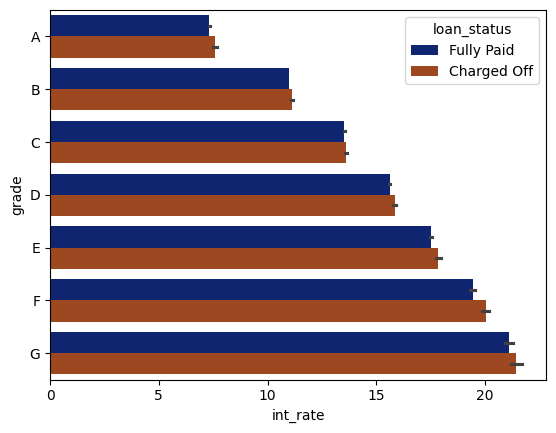

In [63]:
sns.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="dark", order=['A','B','C','D','E','F','G'])
plt.show()

<h5>2. Interest Rate vs Loan Amount Groups </h5>

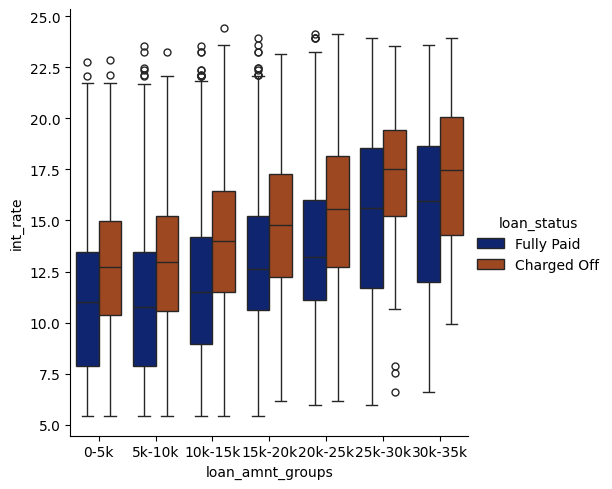

In [64]:
sns.catplot(data =loan ,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="dark", kind = 'box')
plt.show()

<h5>3. Interest Rate vs DTI groups </h5>

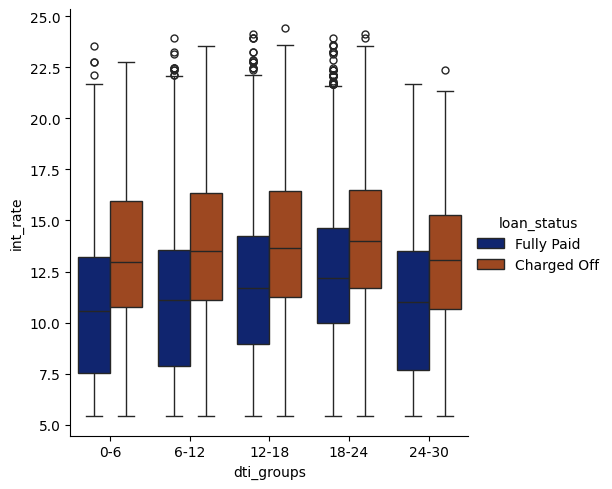

In [65]:
sns.catplot(data =loan ,y ='int_rate', x ='dti_groups', hue ='loan_status',palette="dark", kind = 'box')
plt.show()

* Applicants who receive loan amounts of $15,000 or more are at a higher risk of defaulting. To reduce this risk, the company should consider implementing more rigorous evaluations for larger loan requests and possibly setting a cap on loan amounts for applicants deemed higher risk.
* High Debt-to-Income (DTI) ratios and interest rates between 13% and 17% are linked to higher default rates. To mitigate this, the company should reassess its interest rate determination process and consider adjusting rates based on DTI ratios to better match borrowers' repayment capacities.

### Summary of Bivariate Analysis

1. Loan applicants in Grades B, C, and D account for most "Charged Off" loans.
2. Subgrades B3, B4, and B5 are associated with a higher likelihood of charge-offs.
3. Applicants seeking loans with a 60-month term are more prone to default than those opting for 36-month terms.
4. Most loan applicants have ten or more years of experience, and this group also exhibits the highest default rates.
5. The number of loan applicants steadily increased from 2007 to 2011, suggesting a positive growth trend in subsequent years.
6. December is the most popular month for taking loans, likely due to holiday-related expenses.
7. Debt consolidation is the most common loan purpose, and it also has the highest number of defaults.
8. Applicants living in rented or mortgaged homes are more likely to default on their loans.
9. Verified loan applicants have higher default rates compared to those who are not verified.
10. Loan applicants who charged off typically had significantly high Debt-to-Income (DTI) ratios.
11. A notable proportion of applicants who defaulted had loans with interest rates between 13% and 17%.